# Technique d’appariement par corrélation 

## Enoncé :
Le but de ce TP est de mettre en œuvre une technique d’appariement par corrélation qui permet de mettre en correspondance les points entre deux images en utilisant une mesure de corrélation croisée normalisée centrée.

•	Calculer la corrélation point par point entre l’image 1 et l’image 2 suivant l'algorithme de mise en correspondance

In [163]:
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg 
from scipy import ndimage
import sys
from numpy import *

In [164]:
img0 = cv2.imread('C:\\Users\\moham\\OneDrive\\Bureau\\IMG1.jpg',0) # charger et redimensionner les 2 image
img11 = cv2.resize(img0,(40,40))
img00 = cv2.imread('C:\\Users\\moham\\OneDrive\\Bureau\\IMG2.jpg',0)
img22 = cv2.resize(img00,(40,40))

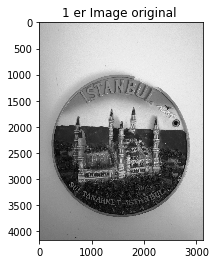

In [165]:
plt.imshow(img0,cmap='gray') # Afficher 1 er image
plt.title('1 er Image original ')
plt.show()

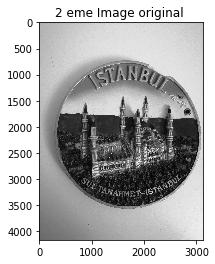

In [166]:
plt.imshow(img00,cmap='gray') # Afficher 1 er image
plt.title('2 eme Image original ')
plt.show()

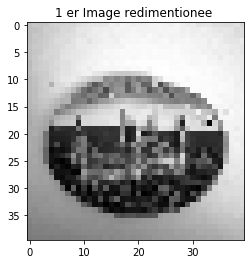

In [167]:
plt.imshow(img11,cmap='gray') # Afficher 1 er image
plt.title('1 er Image redimentionee ')
plt.show()

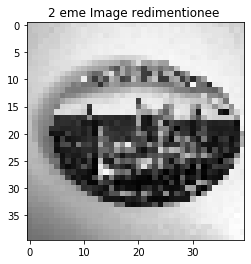

In [168]:
plt.imshow(img22,cmap='gray') # Afficher 2 eme image
plt.title('2 eme Image redimentionee ')
plt.show()

In [169]:
n=img11.shape[0] # extraire la taille de les 2 image
m=img11.shape[1]

nn=img22.shape[0]
mm=img22.shape[1]

In [170]:
def init(n,m):                      # ajouter le contour a les 2 image pour traiter tout les pixel
    return np.zeros((n, m))

img1 = img2 = init(n+2,m+2)  
            

for i in range(n):
        for j in range(m):
            img1[i+1,j+1] = img11[i, j]
            img2[i+1,j+1] = img22[i, j]

In [171]:
xn= np.zeros((40*40))  # les vecteur pour Stocker les coordonnées de pixels x et y de le 2 eme image
yn= np.zeros((40*40))

In [173]:
s=0 
inx=0
iny=0
q=0                #4 boucle imbriqué , 2 pour passe par tous les pixel de la 1er image
i=1                # et 2 pour compare Le pixel de limage 1 Par tout les pixel
while i < n-1:  
    j=1
    while j < m-1:
        ii=1
        while ii < n-1:
            jj=1
            while jj < m-1:
                mo1=np.mean(img1[i-1:i+2,j-1:j+2]) 
                mo2=np.mean(img2[ii-1:ii+2,jj-1:jj+2])
                F1[0]=img1[i,j]          #les élément de la fenêtre
                F1[1]=img1[i-1,j]
                F1[2]=img1[i+1,j]
                F1[3]=img1[i,j-1]
                F1[4]=img1[i,j+1]
                F1[5]=img1[i-1,j-1]
                F1[6]=img1[i+1,j+1]
                F1[7]=img1[i-1,j+1]
                F1[8]=img1[i+1,j-1]
                F2[0]=img2[ii,jj]
                F2[1]=img2[ii-1,jj]
                F2[2]=img2[ii+1,jj]
                F2[3]=img2[ii,jj-1]
                F2[4]=img2[ii,jj+1]
                F2[5]=img2[ii-1,jj-1]
                F2[6]=img2[ii+1,jj+1]
                F2[7]=img2[ii-1,jj+1]
                F2[8]=img2[ii+1,jj-1]
                sp=(np.mean((F1-mo1)*(F2-mo2))*9)/((linalg.norm(F1-mo1))*(linalg.norm(F2-mo2)))
                if sp > s:
                    s=sp
                    inx=ii
                    iny=jj
                jj+=1
            ii+=1
        xn[q]=inx 
        yn[q]=iny
        q=q+1
        j+=1
    i+=1


In [174]:
d=0
print('Pixel[X,Y] de la 1 er image ','===>',' Pixel[X,Y] de la 2 eme image')
i=1
while i < 40:  
    j=1
    while j < 40:
        print('Pixel[',i,',',j,'] de la 1 er image','===>','Pixel[',xn[d],',',yn[d],'] de la 2 eme image')
        d+=1
        j+=1
    i+=1

Pixel[X,Y] de la 1 er image  ===>  Pixel[X,Y] de la 2 eme image
Pixel[ 1 , 1 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 2 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 3 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 4 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 5 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 6 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 7 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 8 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 9 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 10 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 11 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 12 ] de la 1 er image ===> Pixel[ 1.0 , 1.0 ] de la 2 eme image
Pixel[ 1 , 13 ] de la 1 er image ===> Pixel[ 

## remarque
il ya beaucoup calcul sur l'image original, nous avon redimensionner la taille de l'image a 40*40, donc l'image va etre 
flou les résultat non son pas precis 